# Ensemble Learning

In [1]:
# Let's use VotingClassifier
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
         ("rf", RandomForestClassifier(random_state=42)),
         ("svc", SVC(random_state=42))])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [2]:
for name, clf in voting_clf.named_estimators_.items():
  print(f"{name} = {clf.score(X_test, y_test):.2f} accuracy")

lr = 0.86 accuracy
rf = 0.90 accuracy
svc = 0.90 accuracy


In [3]:
voting_clf.predict(X_test[:1])

array([1])

In [4]:
voting_clf.score(X_test, y_test)

0.912

In [5]:
# Let's change hard voting to soft voting
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True # because SVMs don't have probabilities
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [6]:
# Let's try bagging and pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42) # If you want to use pasting set bootstrap=False. n_jobs number of CPU (-1 is all)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [11]:
# Feature Importance
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
rnd_clf.feature_importances_, iris.data.columns # Importance and column

(array([0.11249225, 0.02311929, 0.44103046, 0.423358  ]),
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'))

In [18]:
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)

dig_forest = RandomForestClassifier(n_estimators=500, random_state=42)
dig_forest.fit(digits.data, digits.target)

RandomForestClassifier(n_estimators=500, random_state=42)

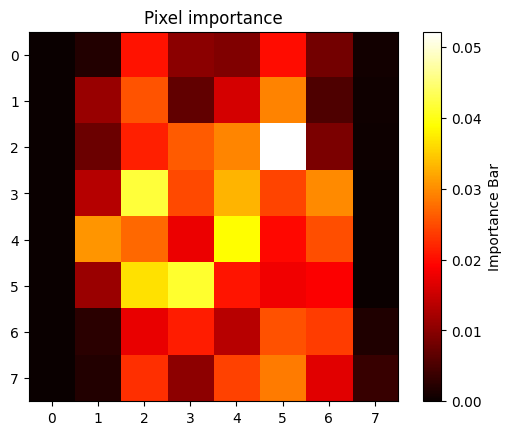

In [56]:
import matplotlib.pyplot as plt

plt.imshow(dig_forest.feature_importances_.reshape(8, 8), cmap="hot")
plt.title("Pixel importance")

plt.colorbar(label="Importance Bar")

In [57]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,
                             learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [69]:
# Gradient Boosting
# Generate the dataset and fit the model
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # y = 3x**2 + Gauussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

# Train second DecisionTreeRegressor on the residual errors made by the previous one
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

# And so on...
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

# Let's predict
X_new = np.array([[-0.4], [0], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [72]:
# The same as above but in one class
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)
gbrt.predict(X_new)

array([0.49484029, 0.04021166, 0.75026781])

In [96]:
# To get right amount of tree use n_iter_no_change, it will stop adding trees if not needed (Early Stopping)

gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500, n_iter_no_change=10, random_state=42)

gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [94]:
gbrt_best.n_estimators_, gbrt_best.n_estimators

(92, 500)

In [102]:
# Histogram-Based Gradient Boosting
from sklearn.ensemble import HistGradientBoostingRegressor

histgb = HistGradientBoostingRegressor()
histgb.fit(X, y)

HistGradientBoostingRegressor()

In [103]:
# Stacking instead of Voting
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(probability=True, random_state=42))
    ], final_estimator=RandomForestClassifier(random_state=43),
    cv=3
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

# 8.

In [109]:
digits1 = load_digits(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(digits1.data, digits1.target, test_size=0.2)

X_val = digits1.data[:int(len(digits1.data)*0.2)]
y_val = digits1.target[:int(len(digits1.data)*0.2)]

In [133]:
# Shuffle it
indx = np.random.permutation(1437)

X_train, y_train = X_train.values[indx], y_train.values[indx]

In [135]:
from sklearn.tree import ExtraTreeClassifier

rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
ex = ExtraTreeClassifier(random_state=42)

In [139]:
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)
ex.fit(X_train, y_train)

ExtraTreeClassifier(random_state=42)

In [136]:
vot_c = VotingClassifier(estimators=[
    ("rf", RandomForestClassifier(random_state=42)),
    ("svc", SVC(random_state=42)),
    ("ex", ExtraTreeClassifier(random_state=42))
])

vot_c.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('ex', ExtraTreeClassifier(random_state=42))])

In [155]:
# Validation
from sklearn.metrics import f1_score

print(f"SVC: {f1_score(svc.predict(X_val.values), y_val, average='weighted')}")
print(f"RF: {f1_score(rf.predict(X_val.values), y_val, average='weighted')}")
print(f"EX: {f1_score(ex.predict(X_val.values), y_val, average='weighted')}")
print(f"VOT_C: {f1_score(vot_c.predict(X_val.values), y_val, average='weighted')}")

SVC: 0.9889033843628245
RF: 0.9944289693593314
EX: 0.9664861921917638
VOT_C: 0.9944289693593314


In [156]:
# Test
from sklearn.metrics import f1_score

print(f"SVC: {f1_score(svc.predict(X_test.values), y_test, average='weighted')}")
print(f"RF: {f1_score(rf.predict(X_test.values), y_test, average='weighted')}")
print(f"EX: {f1_score(ex.predict(X_test.values), y_test, average='weighted')}")
print(f"VOT_C: {f1_score(vot_c.predict(X_test.values), y_test, average='weighted')}")

SVC: 0.9832936926876575
RF: 0.9806178739520901
EX: 0.8175432047163312
VOT_C: 0.9805735849078009


# 9.

In [167]:
X_train_blender = list(zip(svc.predict(X_val.values), rf.predict(X_val.values), ex.predict(X_val.values)))
y_train_blender = y_val

In [180]:
blender = SVC(kernel = 'poly', degree = 3, coef0=1, C=5)
blender.fit(X_train_blender, y_train_blender)

SVC(C=5, coef0=1, kernel='poly')

In [182]:
X_test_blender = list(zip(svc.predict(X_test.values), rf.predict(X_test.values), ex.predict(X_test.values)))
y_test_blender = y_test

blender_test_preds = blender.predict(X_test_blender)

f1_score(blender_test_preds, y_test_blender, average="weighted")

0.9440842449373712

In [186]:
stck_clf = StackingClassifier(estimators=[
    ("rf", RandomForestClassifier(random_state=42)),
    ("svc", SVC(random_state=42)),
    ("ex", ExtraTreeClassifier(random_state=42))
])

stck_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ex', ExtraTreeClassifier(random_state=42))])

In [191]:
f1_score(stck_clf.predict(X_test.values), y_test, average="weighted")

0.9805516369234499